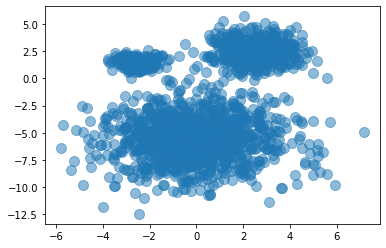

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500
D = 2 # dimensionality of input

X1 = np.random.randn(1000, 2)*2 + np.array([0, -5.5])
X2 = np.random.randn(500, 2) + np.array([2.5, 2.5])
X3 = np.random.randn(200, 2)/2 + np.array([-2.5, 1.5])
X = np.vstack([X1, X2, X3])

plt.scatter(X[:, 0], X[:, 1], s=100, alpha=0.5)
plt.show()

In [0]:
from scipy.stats import multivariate_normal

def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((N, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K)/K

    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.diag(np.ones(D))


    costs = []
    weighted_pdfs = np.zeros((N, K))

    grid_width = 5
    grid_height = max_iter/grid_width
    random_colors = np.random.random((K, 3))
    plt.figure(figsize=(20,20))

    for i in range(max_iter):

        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        for k in range(K):
            for n in range(N):
                weighted_pdfs[n, k] = pi[k] * multivariate_normal.pdf(X[n], M[k], C[k])
        
        for k in range(K):
            for n in range(N):
                R[n, k] = weighted_pdfs[n, k]/weighted_pdfs[n, :].sum()

        for k in range(K):
            Nk = R[:, k].sum()
            pi[k] = Nk/N
            M[k] = R[:, k].dot(X)/Nk

            delta = X - M[k] 
            Rdelta = np.expand_dims(R[:,k], -1) * delta 
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*smoothing

        costs.append(np.log(weighted_pdfs.sum(axis=1)).sum())

        if i>0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break

    plt.show()

    plt.plot(costs)
    plt.show()

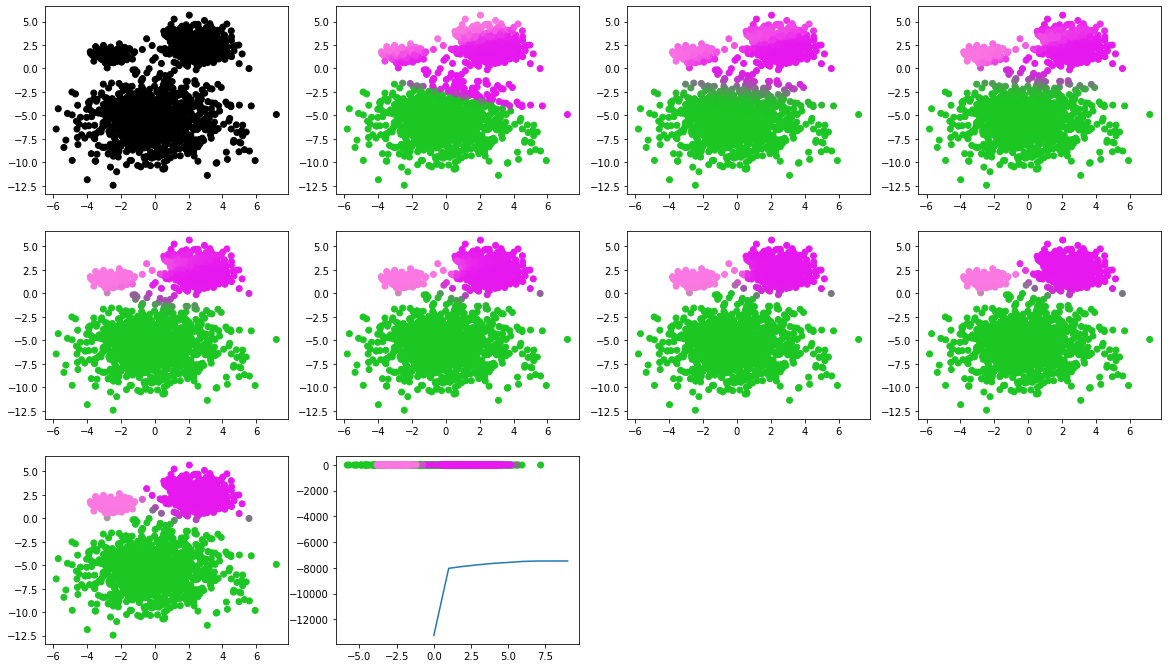

In [0]:
gmm(X, 3)